# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
252,2019-05-01,291.81,2019-05-06,289.25,-2.56,-532.48,208,50386.34,LONG,SPY
253,2019-05-07,287.93,2019-06-06,283.29,-4.64,-969.76,209,49416.59,LONG,SPY
254,2019-06-26,290.47,2019-07-02,295.61,5.14,1048.56,204,50465.14,LONG,SPY
255,2019-07-19,297.17,2019-07-25,300.94,3.77,765.31,203,51230.45,LONG,SPY
256,2019-07-31,297.43,2019-08-30,294.22,-3.21,-658.05,205,50572.40,LONG,SPY
257,2019-09-20,298.28,2019-10-14,295.93,-2.35,-477.05,203,50095.35,LONG,SPY
258,2019-12-03,309.55,2019-12-13,316.87,7.32,1420.08,194,51515.43,LONG,SPY
259,2020-01-27,323.50,2020-02-05,332.27,8.77,1666.30,190,53181.73,LONG,SPY
260,2020-02-21,333.48,2020-03-05,304.98,-28.50,-5386.50,189,47795.23,LONG,SPY
261,2020-06-24,304.09,2020-07-06,316.37,12.28,2333.20,190,50128.43,LONG,SPY


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-08,60128.43,60128.43,60128.43,0,60128.43,0.00,-
2020-07-09,60128.43,60128.43,60128.43,0,60128.43,0.00,-
2020-07-10,60128.43,60128.43,60128.43,0,60128.43,0.00,-
2020-07-13,60128.43,60128.43,60128.43,0,60128.43,0.00,-
2020-07-14,60128.43,60128.43,60128.43,0,60128.43,0.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                  1993-11-11
end                                                    2020-07-14
beginning_balance                                           10000
ending_balance                                           60128.43
total_net_profit                                         50128.43
gross_profit                                            101104.89
gross_loss                                              -50976.46
profit_factor                                                1.98
return_on_initial_capital                                  501.28
annual_return_rate                                           6.96
trading_period                           26 years 8 months 3 days
pct_time_in_market                                          33.24
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-14 00:00:00 SELL 215 SPY @ 316.03


Plot Equity Curves: Strategy vs Benchmark

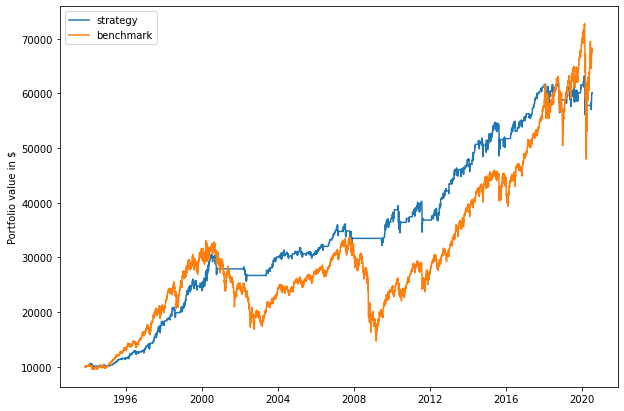

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

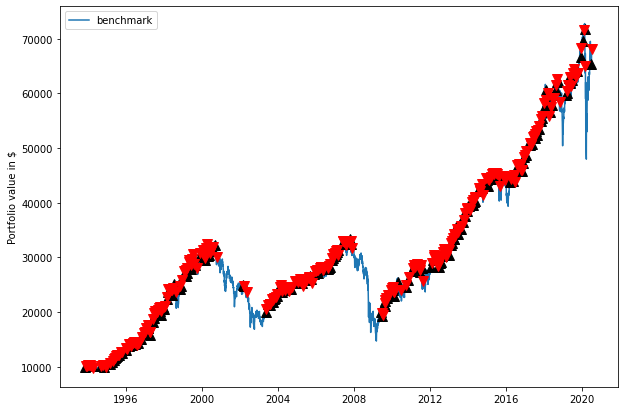

In [12]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.96,7.45
max_closed_out_drawdown,-16.06,-56.42
drawdown_annualized_return,-2.31,-7.57
drawdown_recovery,-1.84,-1.42
best_month,12.77,23.06
worst_month,-13.32,-31.38
sharpe_ratio,0.72,0.47
sortino_ratio,0.55,0.60
monthly_std,2.18,4.54


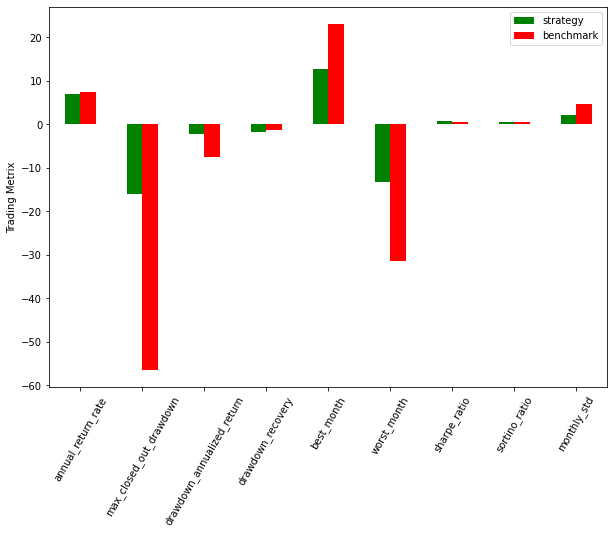

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, metrics)
df